In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

In [3]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
np.set_printoptions(threshold=1000)

## Import

In [18]:
path_to_ensemble_output = '/home/adam/cloud/gdrive/postdoc/simulation_output/conifer-allom-092123_5pfts_-17e2acb6a_FATES-55794e61/ensemble_output_conifer-allom-092123_5pfts_-17e2acb6a_FATES-55794e61v2.csv'

df = pd.read_csv(path_to_ensemble_output)
df = df.drop([df.columns[0]],axis=1)

## Get correlation coefficients with ShannonE

In [30]:
shannon_correlation = df.corrwith(df['ShannonE'])
cor_df = pd.DataFrame(shannon_correlation)
cor_df.columns = ["cor"]
cor_df["abs_cor"] = abs(cor_df["cor"])
cor_df.sort_values("abs_cor",ascending=False)

,cor,abs_cor
ShannonE,1.000000,1.000000
FailedPFTs,-0.821894,0.821894
BA_fir,0.562914,0.562914
BA_cedar,0.540246,0.540246
BA_pine,0.508977,0.508977
fates_leaf_vcmax25top_5,-0.319121,0.319121
Pct_high_severity_1700,-0.309502,0.309502
Pct_high_severity_3500,-0.296822,0.296822
Burned_area,-0.285939,0.285939
fates_leaf_slatop_5,-0.272735,0.272735


(array([ 5., 21., 40., 18.,  7.,  8.,  4.,  3.,  0.,  2.]),
 array([0.007 , 0.0277, 0.0484, 0.0691, 0.0898, 0.1105, 0.1312, 0.1519,
        0.1726, 0.1933, 0.214 ]),
 <BarContainer object of 10 artists>)

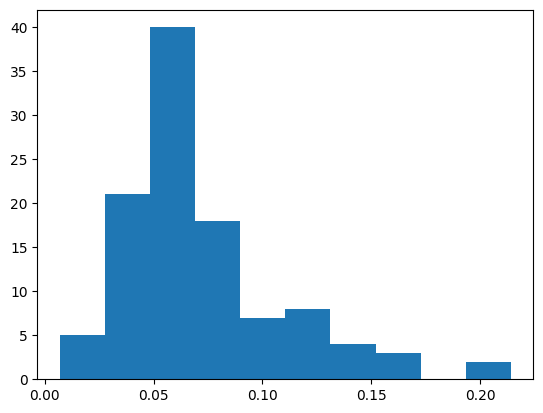

In [36]:
plt.hist(df.Burned_area)

(array([ 8.,  8.,  6., 10., 10., 11., 18., 17., 15.,  5.]),
 array([ 3.01507538, 11.75466373, 20.49425208, 29.23384044, 37.97342879,
        46.71301714, 55.45260549, 64.19219385, 72.9317822 , 81.67137055,
        90.4109589 ]),
 <BarContainer object of 10 artists>)

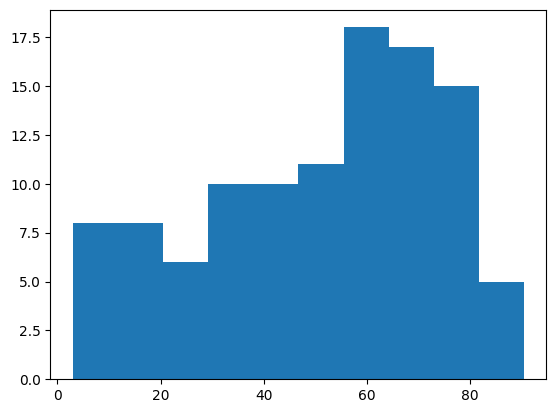

In [37]:
plt.hist(df.Pct_high_severity_1700)

Text(0, 0.5, 'PHS 1700 Kw m-1 s-1')

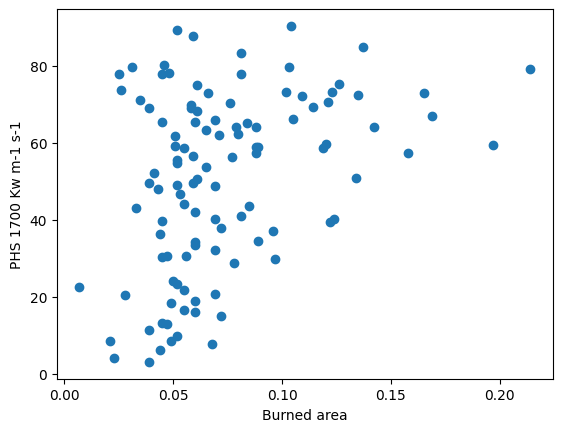

In [40]:
plt.scatter(df["Burned_area"],df['Pct_high_severity_1700'])
plt.xlabel("Burned area")
plt.ylabel("PHS 1700 Kw m-1 s-1")

## Visualize affect of fire and fuel on ShannonE

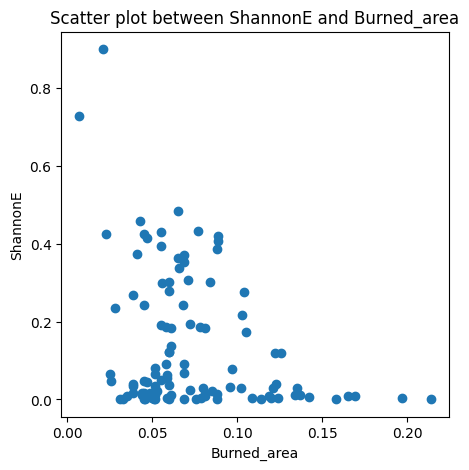

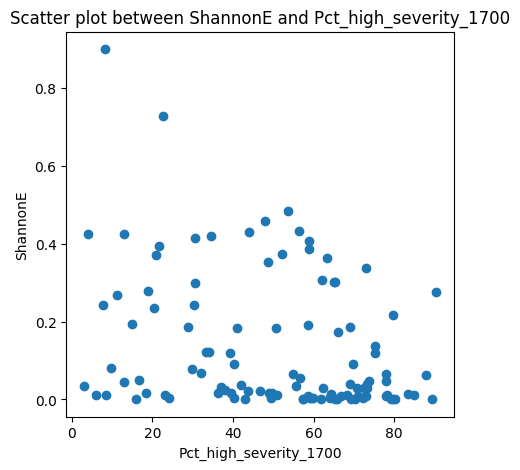

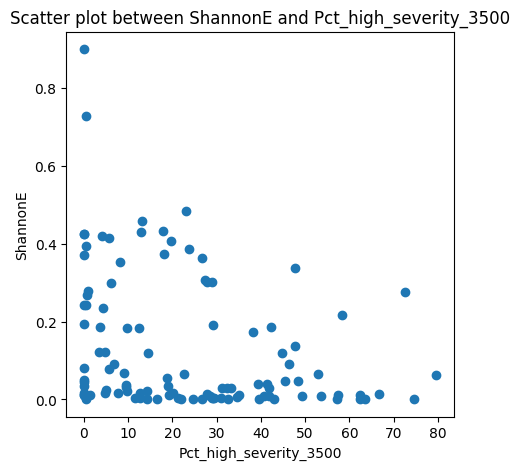

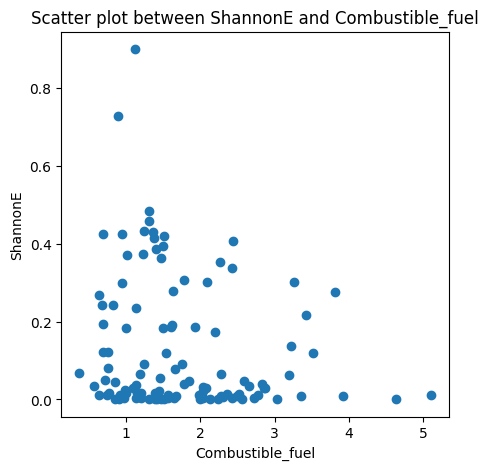

In [29]:
y_variable="ShannonE"
for col in ["Burned_area","Pct_high_severity_1700","Pct_high_severity_3500","Combustible_fuel"]:
    plt.figure(figsize=(5, 5))
    plt.scatter(df[col],df[y_variable])
    plt.title(f'Scatter plot between {y_variable} and {col}')
    plt.xlabel(col)
    plt.ylabel(y_variable)
    plt.show()

## What drives fire severity?

In [31]:
shannon_correlation = df.corrwith(df['Pct_high_severity_1700'])
cor_df = pd.DataFrame(shannon_correlation)
cor_df.columns = ["cor"]
cor_df["abs_cor"] = abs(cor_df["cor"])
cor_df.sort_values("abs_cor",ascending=False)

,cor,abs_cor
Pct_high_severity_1700,1.000000,1.000000
Pct_high_severity_3500,0.918184,0.918184
Combustible_fuel,0.738948,0.738948
NPP,0.673967,0.673967
fates_frag_maxdecomp_0,-0.622646,0.622646
fates_leaf_vcmax25top_5,0.566572,0.566572
Burned_area,0.368822,0.368822
fates_leaf_slatop_5,0.349321,0.349321
fates_turnover_leaf_5,-0.317704,0.317704
ShannonE,-0.309502,0.309502


## What drives combustible fuel?

In [32]:
shannon_correlation = df.corrwith(df['Combustible_fuel'])
cor_df = pd.DataFrame(shannon_correlation)
cor_df.columns = ["cor"]
cor_df["abs_cor"] = abs(cor_df["cor"])
cor_df.sort_values("abs_cor",ascending=False)

,cor,abs_cor
Combustible_fuel,1.000000,1.000000
NPP,0.812265,0.812265
Pct_high_severity_3500,0.749503,0.749503
Pct_high_severity_1700,0.738948,0.738948
BA_shrub,0.643895,0.643895
Burned_area,0.633682,0.633682
Pct_shrub_cover,0.625506,0.625506
Pct_shrub_cover_canopy,0.617682,0.617682
BA,0.612705,0.612705
fates_frag_maxdecomp_0,-0.541428,0.541428


## What drives high burned area with low fire severity

In [33]:
df['BA_to_PHS_1700'] = df['Burned_area'] / df['Pct_high_severity_1700']

In [34]:
shannon_correlation = df.corrwith(df['BA_to_PHS_1700'])
cor_df = pd.DataFrame(shannon_correlation)
cor_df.columns = ["cor"]
cor_df["abs_cor"] = abs(cor_df["cor"])
cor_df.sort_values("abs_cor",ascending=False)

,cor,abs_cor
BA_to_PHS_1700,1.000000,1.000000
Pct_high_severity_1700,-0.650921,0.650921
fates_fire_nignitions_0,0.527431,0.527431
Pct_high_severity_3500,-0.468672,0.468672
fates_frag_maxdecomp_0,0.394337,0.394337
NPP,-0.346415,0.346415
AGB,-0.323640,0.323640
fates_allom_d2ca_coefficient_max_5,0.311719,0.311719
Combustible_fuel,-0.301402,0.301402
fates_leaf_vcmax25top_5,-0.297020,0.297020


In [23]:
# my_metrics = ["BA","AGB","TreeStemD","ShannonE","NPP","FailedPFTs",
#               "Burned_area","Pct_high_severity_1700","Pct_high_severity_3500",
#               "Pct_shrub_cover_canopy","Pct_shrub_cover",
#               "Combustible_fuel"]

to_drop = ["BA","AGB","TreeStemD","ShannonE","NPP","FailedPFTs"]
to_drop.extend(list(df.filter(regex='BA').columns))
to_drop

['BA',
 'AGB',
 'TreeStemD',
 'ShannonE',
 'NPP',
 'FailedPFTs',
 'BA',
 'BA_pine',
 'BA_cedar',
 'BA_fir',
 'BA_shrub',
 'BA_oak']

## Fit Lasso Regression

In [24]:
X = df.drop(columns=to_drop)

y = df['ShannonE']

# Standardize the features (important for Lasso)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.05, random_state=0)

# Initialize Lasso model
# You can change the alpha parameter, higher values give stronger regularization
lasso = Lasso(alpha=0.01, max_iter=10000)

# Fit the model
lasso.fit(X_train, y_train)

print(f"R-squared on training data: {lasso.score(X_train, y_train):.2f}")

# Predict on the test data
y_pred = lasso.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse:.2f}")

# View the coefficients of the model
coef = pd.DataFrame()
coef['Feature'] = X.columns
coef['Coefficient'] = lasso.coef_
print(coef)

R-squared on training data: 0.57
Mean Squared Error on test data: 0.03
                                      Feature   Coefficient
0                                 Burned_area -2.078132e-02
1                      Pct_high_severity_1700 -0.000000e+00
2                      Pct_high_severity_3500 -0.000000e+00
3                      Pct_shrub_cover_canopy  0.000000e+00
4                             Pct_shrub_cover  0.000000e+00
5                            Combustible_fuel  0.000000e+00
6                                        inst -0.000000e+00
7           fates_recruit_seed_alloc_mature_1 -0.000000e+00
8           fates_recruit_seed_alloc_mature_2 -5.778749e-03
9           fates_recruit_seed_alloc_mature_3  0.000000e+00
10          fates_recruit_seed_alloc_mature_4  0.000000e+00
11          fates_recruit_seed_alloc_mature_5  0.000000e+00
12   fates_recruit_seed_dbh_repro_threshold_1 -1.545460e-03
13   fates_recruit_seed_dbh_repro_threshold_2 -0.000000e+00
14   fates_recruit_seed_dbh_r

In [25]:
# After computing the coefficients
coef['Abs_Coefficient'] = coef['Coefficient'].abs()  # Add a column for the absolute values
coef_sorted = coef.sort_values(by='Abs_Coefficient', ascending=False).reset_index(drop=True)  # Sort the DataFrame

# Now, coef_sorted is your sorted DataFrame
print(coef_sorted)

                                      Feature   Coefficient  Abs_Coefficient
0                     fates_leaf_vcmax25top_5 -5.014500e-02     5.014500e-02
1                         fates_leaf_slatop_5 -4.506307e-02     4.506307e-02
2                       fates_fire_alpha_SH_3  2.611415e-02     2.611415e-02
3                     fates_fire_crown_kill_5  2.337378e-02     2.337378e-02
4                     fates_turnover_branch_1  2.311649e-02     2.311649e-02
5                  fates_fire_frac_resprout_4 -2.178402e-02     2.178402e-02
6                                 Burned_area -2.078132e-02     2.078132e-02
7          fates_allom_d2ca_coefficient_max_1  2.024082e-02     2.024082e-02
8       fates_recruit_inter_patch_disp_frac_0  1.726709e-02     1.726709e-02
9                         fates_stoich_nitr_5  1.407454e-02     1.407454e-02
10                    fates_leaf_vcmax25top_2  1.392937e-02     1.392937e-02
11             fates_mort_ip_age_senescence_4  1.352724e-02     1.352724e-02

In [21]:
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Load your dataframe
# df = pd.read_csv('your_data.csv')

# Suppose 'target' is the column you want to predict and rest are features
X = df.drop(columns=to_drop)
y = df['ShannonE']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=0)

# Initialize Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)

# Fit the model
rf.fit(X_train, y_train)

# Check the R-squared on the training data
print(f"R-squared on training data: {rf.score(X_train, y_train):.2f}")

# Predict on the test data
y_pred = rf.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error on test data: {mse:.2f}")

# Getting the feature importances
importances = rf.feature_importances_

# Creating a DataFrame for the feature importances
features = pd.DataFrame()
features['Feature'] = X.columns
features['Importance'] = importances

# Sorting the features based on their importances
features_sorted = features.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Displaying the feature importances
print(features_sorted)

R-squared on training data: 0.84
Mean Squared Error on test data: 0.04
                                     Feature  Importance
0                    fates_leaf_vcmax25top_5    0.106391
1                        fates_leaf_slatop_5    0.052496
2          fates_recruit_seed_alloc_mature_4    0.041001
3            fates_mort_scalar_cstarvation_5    0.035886
4            fates_mort_ip_size_senescence_4    0.032883
5            fates_mort_scalar_cstarvation_1    0.032799
6                 fates_fire_frac_resprout_5    0.032180
7            fates_mort_scalar_cstarvation_3    0.023897
8         fates_allom_d2ca_coefficient_max_5    0.023636
9      fates_recruit_inter_patch_disp_frac_0    0.023543
10        fates_allom_d2ca_coefficient_max_4    0.021389
11                    fates_nonhydro_smpsc_2    0.019170
12                   fates_leaf_vcmax25top_2    0.017363
13                     fates_turnover_leaf_4    0.015430
14  fates_recruit_seed_dbh_repro_threshold_5    0.015313
15               

## Visualize

In [26]:
#print(list(df.columns))
cols_for_scatter = ["fates_turnover_branch_1","fates_turnover_leaf_1"]

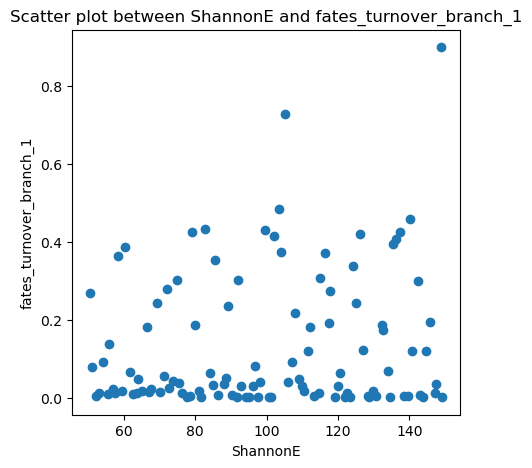

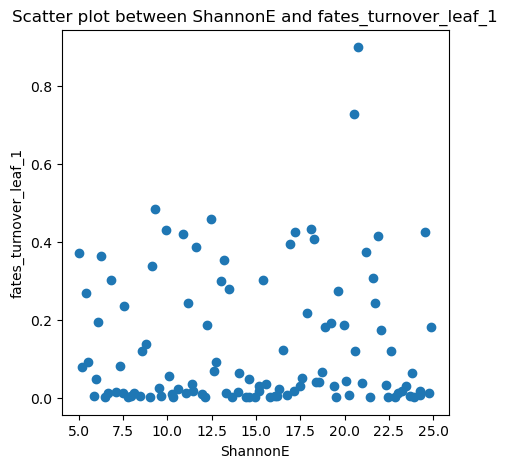

In [28]:
y_variable = 'ShannonE'

# Create a scatter plot for y_variable against each other variable
for col in cols_for_scatter:
    if col != y_variable:
        plt.figure(figsize=(5, 5))
        plt.scatter(df[col],df[y_variable])
        plt.title(f'Scatter plot between {y_variable} and {col}')
        plt.xlabel(y_variable)
        plt.ylabel(col)
        plt.show()